# [ 선형회귀(Linear Regression) ]

- 예측 : 특정한 입력변수 값을 사용해서 출력변수의 값을 계산하는 것 (연속적인 타깃을 예측하는 알고리즘)
    - 출력변수의 값이 연속값인 문제 : 회귀 or 회귀분석 문제
<br>
<br />
- 회귀분석 : 독립변수 $x$에 대응하는 종속변수 $y$와 가장 비슷한 값 $\hat{y}$를 출력하는 함수 f(x)를 찾는 과정  

$$ \hat{y}= f(x) ≈ y $$

- 가장 간단한 지도 학습 알고리즘 중 하나
- Linear regression은 종속변수  y와 한개 이상의 독립 변수  X와의 선형관계를 모델링
    - 선형 관계의 modeling은 1차로 이루어진 직선을 구하는 것

---

## Simple Linear Regression : 독립변수가 하나인 직선 
$$f(x_i) = wx_i + b$$

- $\omega$ : 가중치(weight)
- $b$ : 편향(bias)

<br />

<img src="https://nbviewer.jupyter.org/github/engineersCode/EngComp6_deeplearning/blob/master/images/residuals.png
" width="400" height="300" />

- 예측한 값과 실제 데이터가 가장 비슷한 직선을 찾는 것
- $f(x_i)$ : model의 예측값. 파란 선
- $y$ : 실제 데이터. 빨간 점

### Cost Function (비용함수)
- **실제 데이터(위 그림에서 빨간 점) 과 직선 사이의 차이를 줄이는 것**이 목적 
- cost function을 최소로 하는  w 와  b 를 찾아보자.
- 이차함수의 최솟값을 구하는 방법은? : 미분한 지점이 0이 되는 것
$$\text{cost function} = \frac{1}{N}\sum_{i=1}^n (y_i - f(x_i))^2$$
-> MSE(Mean Squared Error, 평균 제곱 오차)를 비용함수로 사용

- 머신러닝 알고리즘에서 최적화(Optimizer)는 비용함수의 값이 가장 작아지는 최적의 파라미터를 찾는 과정
    - 이를 달성하기 위해서, 경사하강법(Gradient Descent) 기반의 방식이 가장 기본이 되는 알고리즘

### 최솟값 구하는 방법1) 미분

다음 식의 최솟값을 어떻게 찾을 수 있을까? 
- 미분한 값이 0이 되는 지점 -> 최솟값이 되는 지점 (왜?) 
$$f(w) = w^2 + 3w -5$$


In [1]:
!pip install sympy

- sympy Library

    - 방정식 기호(symbol)를 사용하게 해주는 라이브러리
    - 기호 기반 수학 라이브러리 -> 변수를 기호로 선언해주어야함
    - sympy.symbols( ) : x처럼 방정식에 사용하는 미지수를 나타내는 기호를 생성할 때 사용

In [2]:
import sympy # 기호 계산을 위한 오픈 소스 Python 라이브러리
import numpy

from matplotlib import pyplot
%matplotlib inline
sympy.init_printing() # 수식을 LaTex 스타일로 표시

In [3]:
x = sympy.Symbol("x", real= True) # 실수

f = x**2 + 1*x -6
f

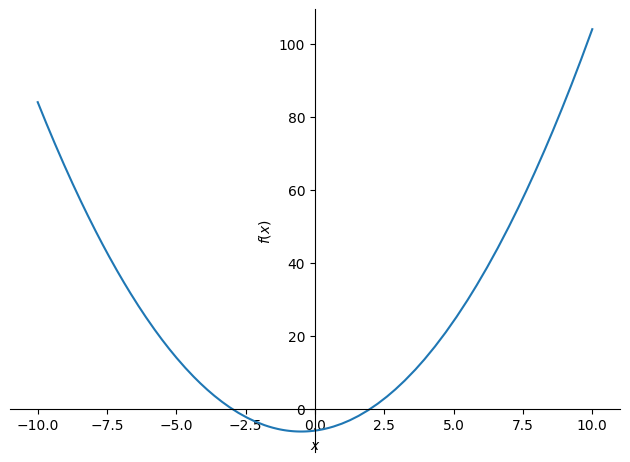

In [4]:
sympy.plotting.plot(f)

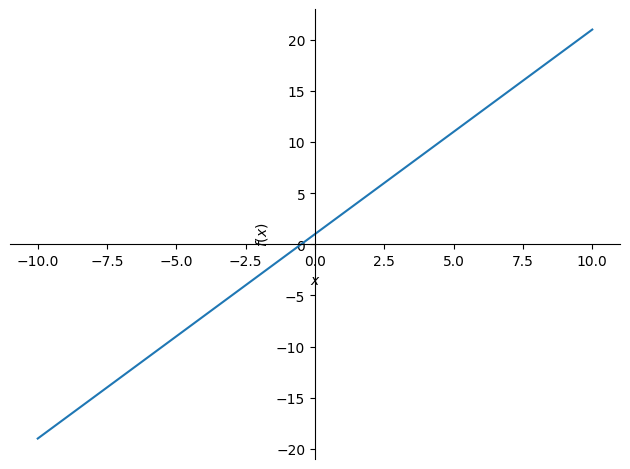

In [5]:
# 1차 미분
fprime = f.diff(x) # numpy.diff
fprime
sympy.plotting.plot(fprime)

In [6]:
# 1차 미분식의 해
sympy.solve(fprime, x) # 2x+1 값의 해 구하기

In [7]:
fp_num = sympy.lambdify(x, fprime)

In [16]:
# Gradient Descent
# 0.1 : learning rate

x = 5
for i in range(100):
    x = x - fp_num(x)*0.1

print(x)

-0.4999999988796302


### 최솟값 구하는 방법2) 경사하강법(Gradient Descent, GD)
- Gradient Descent 구현

<img src="https://nbviewer.jupyter.org/github/engineersCode/EngComp6_deeplearning/blob/master/images/descent.png
" width="400" height="300" />


---

## Exercise : 지구 온도변화
- linear regression을 이용해 지구 온도변화를 예측, 직선 구하기  
https://go.gwu.edu/engcomp1data5?accessType=DOWNLOAD  

1) 연도에 따른 데이터 상승을 그래프로 확인
2) sklearn을 이용해 linear 그래프 예측

In [9]:
import pandas as pd 

In [10]:
url = "https://go.gwu.edu/engcomp1data5?accessType=DOWNLOAD"

data = pd.read_csv(url, header=4)
data

,Year,Value
0,1880,-0.47
1,1881,-0.45
2,1882,-0.41
3,1883,-0.60
4,1884,-0.60
...,...,...
132,2012,0.92
133,2013,1.01
134,2014,1.02
135,2015,1.35


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    137 non-null    int64  
 1   Value   137 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.3 KB


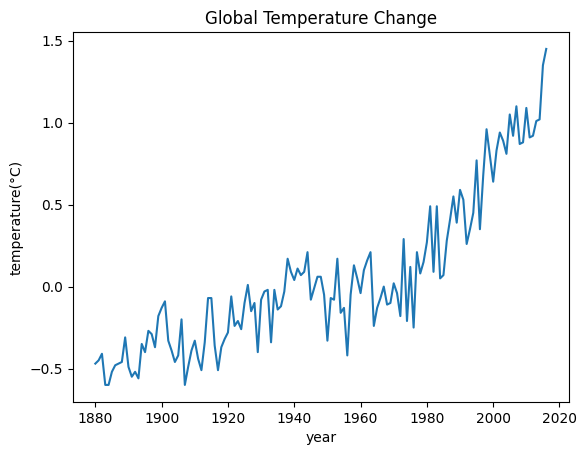

In [12]:
# 연도에 따른 데이터 상승을 그래프로 확인

import matplotlib.pyplot as plt
plt.plot(data.Year, data.Value)  
plt.title("Global Temperature Change")

plt.xlabel("year")
plt.ylabel("temperature(°C)")

plt.show()

In [13]:
# sklearn을 이용한 linear 그래프 예측
import sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression() # fit_intercept=True : 모형에 상수항 존재, y절편을 구한다는 의미. defalut

x_data = data["Year"]
y_data = data["Value"]

model.fit(x_data.values.reshape(-1,1), y_data)

LinearRegression()

In [14]:
print(model.coef_)
print(model.intercept_)

[0.01037028]
-20.148685384658474


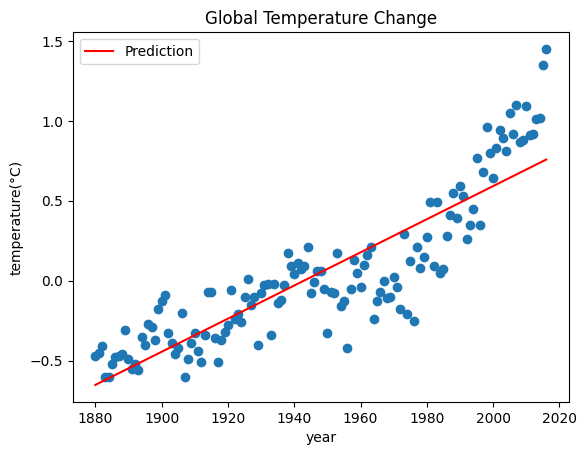

In [15]:
# 기존 X 값으로 y를 예측하게 해서 그래프 생성
# 학습된 model에 학습시킨 데이터를 다시 넣어 확인

# y_pred = model.predict(x_data)

plt.plot(x_data, y_data, 'o')
plt.plot(x_data, model.predict(x_data.values.reshape(-1,1)), color='red', label="Prediction")
plt.title("Global Temperature Change")
plt.xlabel("year")
plt.ylabel("temperature(°C)")
plt.legend()
plt.show()

## Exercise : 당뇨병 예측
### 선형회귀에서 2차원 벡터를 사용하는 이유?


In [2]:
# 당뇨병 예측
from sklearn.datasets import load_diabetes
# load_diabetes?

Signature: load_diabetes(*, return_X_y=False, as_frame=False, scaled=True)
Docstring:
Load and return the diabetes dataset (regression).

==============   ==================
Samples total    442
Dimensionality   10
Features         real, -.2 < x < .2
Targets          integer 25 - 346
==============   ==================

.. note::
   The meaning of each feature (i.e. `feature_names`) might be unclear
   (especially for `ltg`) as the documentation of the original dataset is
   not explicit. We provide information that seems correct in regard with
   the scientific literature in this field of research.

Read more in the :ref:`User Guide <diabetes_dataset>`.

Parameters
----------
return_X_y : bool, default=False
    If True, returns ``(data, target)`` instead of a Bunch object.
    See below for more information about the `data` and `target` object.

    .. versionadded:: 0.18

as_frame : bool, default=False
    If True, the data is a pandas DataFrame including columns with
    appropriat

In [4]:
diabetes = load_diabetes() # dataset load
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [8]:
print(diabetes.DESCR) # DESCR 속성을 사용해 데이터셋의 정보 확인

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
# 총 442개의 데이터, 10개의 특징
# 이미 vector 
print(diabetes.data.shape, "\n")

# 총 569개의 Label Data
print(diabetes.target.shape, "\n")

# 30개의 특징에 대한 feature의 정보
print(diabetes.feature_names)

(442, 10) 

(442,) 

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [5]:
import pandas as pd
data = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
data["target"] = diabetes.target # target (label) 값 지정
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None


In [13]:
# bmi 지수로 당뇨병을 예측해보자

import sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(data["bmi"], data["target"])

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469 -0.04069594
 -0.04716281 -0.00189471  0.06169621  0.03906215 -0.08380842  0.01750591
 -0.02884001 -0.00189471 -0.02560657 -0.01806189  0.04229559  0.01211685
 -0.0105172  -0.01806189 -0.05686312 -0.02237314 -0.00405033  0.06061839
  0.03582872 -0.01267283 -0.07734155  0.05954058 -0.02129532 -0.00620595
  0.04445121 -0.06548562  0.12528712 -0.05039625 -0.06332999 -0.03099563
  0.02289497  0.01103904  0.07139652  0.01427248 -0.00836158 -0.06764124
 -0.0105172  -0.02345095  0.06816308 -0.03530688 -0.01159501 -0.0730303
 -0.04177375  0.01427248 -0.00728377  0.0164281  -0.00943939 -0.01590626
  0.0250506  -0.04931844  0.04121778 -0.06332999 -0.06440781 -0.02560657
 -0.00405033  0.00457217 -0.00728377 -0.0374625  -0.02560657 -0.02452876
 -0.01806189 -0.01482845 -0.02991782 -0.046085   -0.06979687  0.03367309
 -0.00405033 -0.02021751  0.00241654 -0.03099563  0.02828403 -0.03638469
 -0.05794093 -0.0374625   0.01211685 -0.02237314 -0.03530688  0.00996123
 -0.03961813  0.07139652 -0.07518593 -0.00620595 -0.04069594 -0.04824063
 -0.02560657  0.0519959   0.00457217 -0.06440781 -0.01698407 -0.05794093
  0.00996123  0.08864151 -0.00512814 -0.06440781  0.01750591 -0.04500719
  0.02828403  0.04121778  0.06492964 -0.03207344 -0.07626374  0.04984027
  0.04552903 -0.00943939 -0.03207344  0.00457217  0.02073935  0.01427248
  0.11019775  0.00133873  0.05846277 -0.02129532 -0.0105172  -0.04716281
  0.00457217  0.01750591  0.08109682  0.0347509   0.02397278 -0.00836158
 -0.06117437 -0.00189471 -0.06225218  0.0164281   0.09618619 -0.06979687
 -0.02129532 -0.05362969  0.0433734   0.05630715 -0.0816528   0.04984027
  0.11127556  0.06169621  0.01427248  0.04768465  0.01211685  0.00564998
  0.04660684  0.12852056  0.05954058  0.09295276  0.01535029 -0.00512814
  0.0703187  -0.00405033 -0.00081689 -0.04392938  0.02073935  0.06061839
 -0.0105172  -0.03315126 -0.06548562  0.0433734  -0.06225218  0.06385183
  0.03043966  0.07247433 -0.0191397  -0.06656343 -0.06009656  0.06924089
  0.05954058 -0.02668438 -0.02021751 -0.046085    0.07139652 -0.07949718
  0.00996123 -0.03854032  0.01966154  0.02720622 -0.00836158 -0.01590626
  0.00457217 -0.04285156  0.00564998 -0.03530688  0.02397278 -0.01806189
  0.04229559 -0.0547075  -0.00297252 -0.06656343 -0.01267283 -0.04177375
 -0.03099563 -0.00512814 -0.05901875  0.0250506  -0.046085    0.00349435
  0.05415152 -0.04500719 -0.05794093 -0.05578531  0.00133873  0.03043966
  0.00672779  0.04660684  0.02612841  0.04552903  0.04013997 -0.01806189
  0.01427248  0.03690653  0.00349435 -0.07087468 -0.03315126  0.09403057
  0.03582872  0.03151747 -0.06548562 -0.04177375 -0.03961813 -0.03854032
 -0.02560657 -0.02345095 -0.06656343  0.03259528 -0.046085   -0.02991782
 -0.01267283 -0.01590626  0.07139652 -0.03099563  0.00026092  0.03690653
  0.03906215 -0.01482845  0.00672779 -0.06871905 -0.00943939  0.01966154
  0.07462995 -0.00836158 -0.02345095 -0.046085    0.05415152 -0.03530688
 -0.03207344 -0.0816528   0.04768465  0.06061839  0.05630715  0.09834182
  0.05954058  0.03367309  0.05630715 -0.06548562  0.16085492 -0.05578531
 -0.02452876 -0.03638469 -0.00836158 -0.04177375  0.12744274 -0.07734155
  0.02828403 -0.02560657 -0.06225218 -0.00081689  0.08864151 -0.03207344
  0.03043966  0.00888341  0.00672779 -0.02021751 -0.02452876 -0.01159501
  0.02612841 -0.05901875 -0.03638469 -0.02452876  0.01858372 -0.0902753
 -0.00512814 -0.05255187 -0.02237314 -0.02021751 -0.0547075  -0.00620595
 -0.01698407  0.05522933  0.07678558  0.01858372 -0.02237314  0.09295276
 -0.03099563  0.03906215 -0.06117437 -0.00836158 -0.0374625  -0.01375064
  0.07355214 -0.02452876  0.03367309  0.0347509  -0.03854032 -0.03961813
 -0.00189471 -0.03099563 -0.046085    0.00133873  0.06492964  0.04013997
 -0.02345095  0.05307371  0.04013997 -0.02021751  0.01427248 -0.03422907
  0.00672779  0.00457217  0.03043966  0.0519959   0.06169621 -0.00728377
  0.00564998  0.05415152 -0.00836158  0.114509    0.06708527 -0.05578531
  0.03043966 -0.02560657  0.10480869 -0.00620595 -0.04716281 -0.04824063
  0.08540807 -0.01267283 -0.03315126 -0.00728377 -0.01375064  0.05954058
  0.02181716  0.01858372 -0.01159501 -0.00297252  0.01750591 -0.02991782
 -0.02021751 -0.05794093  0.06061839 -0.04069594 -0.07195249 -0.05578531
  0.04552903 -0.00943939 -0.03315126  0.04984027 -0.08488624  0.00564998
  0.02073935 -0.00728377  0.10480869 -0.02452876 -0.00620595 -0.03854032
  0.13714305  0.17055523  0.00241654  0.03798434 -0.05794093 -0.00943939
 -0.02345095 -0.0105172  -0.03422907 -0.00297252  0.06816308  0.00996123
  0.00241654 -0.03854032  0.02612841 -0.08919748  0.06061839 -0.02884001
 -0.02991782 -0.0191397  -0.04069594  0.01535029 -0.02452876  0.00133873
  0.06924089 -0.06979687 -0.02991782 -0.046085    0.01858372  0.00133873
 -0.03099563 -0.00405033  0.01535029  0.02289497  0.04552903 -0.04500719
 -0.03315126  0.097264    0.05415152  0.12313149 -0.08057499  0.09295276
 -0.05039625 -0.01159501 -0.0277622   0.05846277  0.08540807 -0.00081689
  0.00672779  0.00888341  0.08001901  0.07139652 -0.02452876 -0.0547075
 -0.03638469  0.0164281   0.07786339 -0.03961813  0.01103904 -0.04069594
 -0.03422907  0.00564998  0.08864151 -0.03315126 -0.05686312 -0.03099563
  0.05522933 -0.06009656  0.00133873 -0.02345095 -0.07410811  0.01966154
 -0.01590626 -0.01590626  0.03906215 -0.0730303 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [18]:
# sklearn을 이용한 linear 그래프 예측
import sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression() # fit_intercept=True : 모형에 상수항 존재, y절편을 구한다는 의미. defalut

x_data = data["Year"]
y_data = data["Value"]

model.fit(x_data, y_data)

ValueError: Expected 2D array, got 1D array instead:
array=[1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893
 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907
 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921
 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935
 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949
 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.